<a href="https://colab.research.google.com/github/rishikam23/Image-Recognition-using-CNN/blob/main/Image_Recognition_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training the Neural Network for Image classification using Hidden Layers and Different Optimizers**

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
#Network Parameters
NUM_CLASSES=10
#Reshape 28x28 pixel images to a "flatten" array of 784 pixels
RESHAPED=784

#Number of neurons in hidden layer
HIDDEN_NEURONS=256

In [22]:
#Load the Fashion MNIST dataset
fashion_data=tf.keras.datasets.fashion_mnist

#Split between 60,000 train samples and 10,000 tesst samples
(train_images,train_labels),(test_images,test_labels)=fashion_data.load_data()

train_images=train_images.reshape(60000,RESHAPED)
test_images=test_images.reshape(10000,RESHAPED)

train_images,test_images=train_images/255.0, test_images/255.0

#One-hot encoding
train_labels=tf.keras.utils.to_categorical(train_labels,NUM_CLASSES)
test_labels=tf.keras.utils.to_categorical(test_labels,NUM_CLASSES)


In [23]:
#Define the architecture of our CNN
class cnn_fmnist:
  @staticmethod
  def build(input_shape,num_classes):
    model=Sequential([
        Dense(HIDDEN_NEURONS, input_shape=input_shape, name='dense_layer_1', activation='relu'),
        Dense(HIDDEN_NEURONS, input_shape=input_shape, name='dense_layer_2', activation='relu'),
        Dense(num_classes, input_shape=input_shape, name='output_layer', activation='softmax')
    ])
    return model

In [24]:
#Initialize the optimizer and model
model=cnn_fmnist.build(input_shape=(RESHAPED,),num_classes=NUM_CLASSES)

#Compile the model
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)                │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
#Training Parameters
BATCH_SIZE=128
EPOCHS=200
VALIDATION_SPLIT=0.2

In [26]:
#Train the model
model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5532 - loss: 1.5068 - val_accuracy: 0.7408 - val_loss: 0.7611
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7632 - loss: 0.7198 - val_accuracy: 0.7940 - val_loss: 0.6193
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.6060 - val_accuracy: 0.8164 - val_loss: 0.5552
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8196 - loss: 0.5454 - val_accuracy: 0.8188 - val_loss: 0.5269
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8289 - loss: 0.5156 - val_accuracy: 0.8274 - val_loss: 0.5010
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8312 - loss: 0.4915 - val_accuracy: 0.8333 - val_loss: 0.4882
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8377 - loss: 0.4725 - val_accuracy: 0.8363 - val_loss: 0.4735
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8403 - loss: 0.4583 - val_accu

In [27]:
#Evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8840 - loss: 0.3549
Test accuracy: 0.885699987411499


In [28]:
#Compile the model using RMSProp optimizer
model=cnn_fmnist.build(input_shape=(RESHAPED,),num_classes=NUM_CLASSES)
model.compile(optimizer='RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)                │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Train the model
model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7168 - loss: 0.7855 - val_accuracy: 0.8536 - val_loss: 0.3973
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8497 - loss: 0.4069 - val_accuracy: 0.8594 - val_loss: 0.3842
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8714 - loss: 0.3458 - val_accuracy: 0.8696 - val_loss: 0.3545
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.3179 - val_accuracy: 0.8822 - val_loss: 0.3232
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8887 - loss: 0.2989 - val_accuracy: 0.8723 - val_loss: 0.3498
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8940 - loss: 0.2787 - val_accuracy: 0.8754 - val_loss: 0.3634
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9014 - loss: 0.2630 - val_accuracy: 0.8867 - val_loss: 0.3256
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9028 - loss: 0.2569 - val_accu

In [30]:
#Evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8898 - loss: 2.0099
Test accuracy: 0.8895999789237976


In [31]:
#Compile the model using Adam optimizer
model=cnn_fmnist.build(input_shape=(RESHAPED,),num_classes=NUM_CLASSES)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)                │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#Train the model
model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7530 - loss: 0.7124 - val_accuracy: 0.8549 - val_loss: 0.4047
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.3804 - val_accuracy: 0.8668 - val_loss: 0.3709
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8782 - loss: 0.3331 - val_accuracy: 0.8675 - val_loss: 0.3639
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8841 - loss: 0.3152 - val_accuracy: 0.8823 - val_loss: 0.3300
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8981 - loss: 0.2803 - val_accuracy: 0.8844 - val_loss: 0.3272
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8980 - loss: 0.2756 - val_accuracy: 0.8809 - val_loss: 0.3395
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9037 - loss: 0.2558 - val_accuracy: 0.8817 - val_loss: 0.3264
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9088 - loss: 0.2416 - val_accu

In [33]:
#Evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8897 - loss: 1.2422
Test accuracy: 0.8901000022888184


In [34]:
#Compile the model using Nadam optimizer
model=cnn_fmnist.build(input_shape=(RESHAPED,),num_classes=NUM_CLASSES)
model.compile(optimizer='Nadam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)                │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Train the model
model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7676 - loss: 0.6926 - val_accuracy: 0.8587 - val_loss: 0.3953
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8713 - loss: 0.3561 - val_accuracy: 0.8727 - val_loss: 0.3532
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.3214 - val_accuracy: 0.8707 - val_loss: 0.3569
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8909 - loss: 0.2931 - val_accuracy: 0.8732 - val_loss: 0.3461
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8979 - loss: 0.2729 - val_accuracy: 0.8831 - val_loss: 0.3193
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9055 - loss: 0.2549 - val_accuracy: 0.8880 - val_loss: 0.3085
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9100 - loss: 0.2415 - val_accuracy: 0.8859 - val_loss: 0.3164
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9148 - loss: 0.2258 - val_accu

In [38]:
#Evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8926 - loss: 1.3076
Test accuracy: 0.8945000171661377


**Visualizing the training data and performance of the model**

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
#Input image dimensions
IMG_ROWS, IMG_COLS=28, 28

In [41]:
#Load the Fashion MNIST dataset
fashion_data=tf.keras.datasets.fashion_mnist

#Split between 60,000 train samples and 10,000 tesst samples
(train_images,train_labels),(test_images,test_labels)=fashion_data.load_data()

train_images=train_images.reshape(60000,RESHAPED)
test_images=test_images.reshape(10000,RESHAPED)

train_images,test_images=train_images/255.0, test_images/255.0

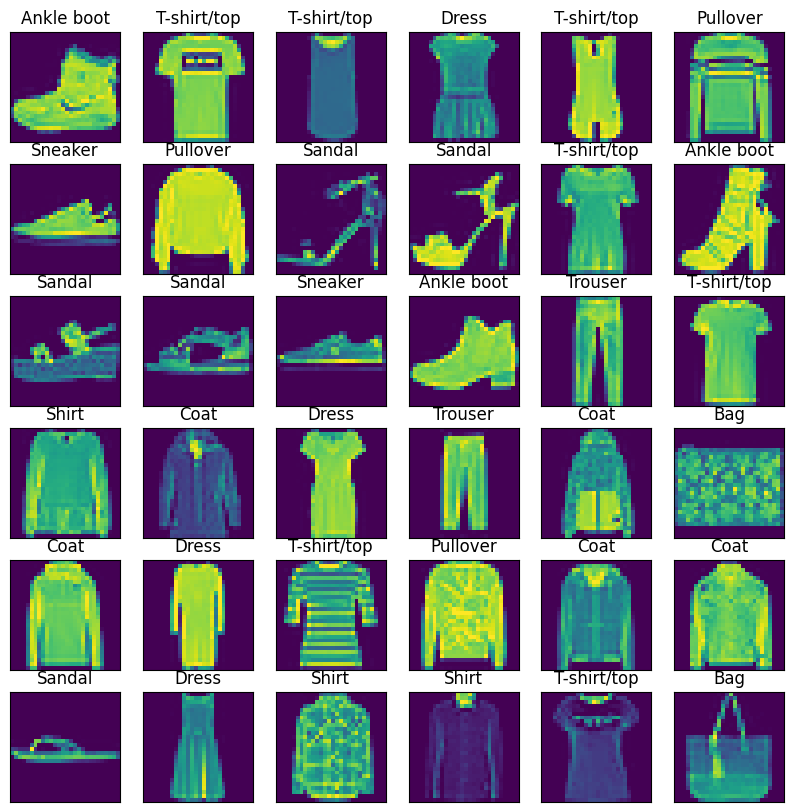

In [42]:
#Visualization
labels={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape(IMG_ROWS,IMG_COLS))
  label_index=train_labels[i]
  plt.title(labels[label_index])
plt.show()

In [43]:
#One-hot encoding
train_labels=tf.keras.utils.to_categorical(train_labels,NUM_CLASSES)
test_labels=tf.keras.utils.to_categorical(test_labels,NUM_CLASSES)

In [44]:
#Compile the model using Adam optimizer
model=cnn_fmnist.build(input_shape=(RESHAPED,),num_classes=NUM_CLASSES)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)                │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history=model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT,verbose=1)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9261 - loss: 0.1964 - val_accuracy: 0.8903 - val_loss: 0.3176
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9294 - loss: 0.1880 - val_accuracy: 0.8907 - val_loss: 0.3311
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9278 - loss: 0.1857 - val_accuracy: 0.8928 - val_loss: 0.3191
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9335 - loss: 0.1749 - val_accuracy: 0.8886 - val_loss: 0.3318
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9372 - loss: 0.1676 - val_accuracy: 0.8911 - val_loss: 0.3300
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9360 - loss: 0.1651 - val_accuracy: 0.8963 - val_loss: 0.3406
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9398 - loss: 0.1570 - val_accuracy: 0.8941 - val_loss: 0.3420
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9433 - loss: 0.1502 - val_accu

In [47]:
#Evaluating the model
score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 1.2568835020065308
Test accuracy: 0.8928999900817871


Text(0.5, 1.0, 'Train - Accuracy')

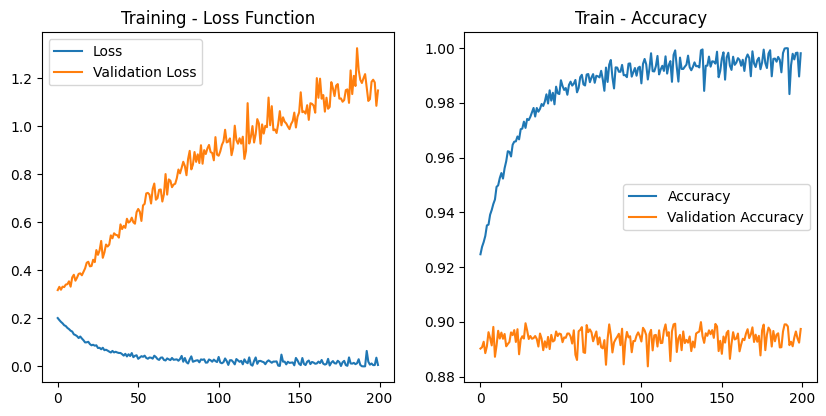

In [48]:
#Plot the loss and accuracy functions for the training and validation sets
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [49]:
predicted_classes=np.around(model.predict(test_images))
predicted_classes=np.argmax(predicted_classes,axis=1)
test_labels=np.argmax(test_labels,axis=1)
correct=np.nonzero(predicted_classes==test_labels)[0]
incorrect=np.nonzero(predicted_classes!=test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


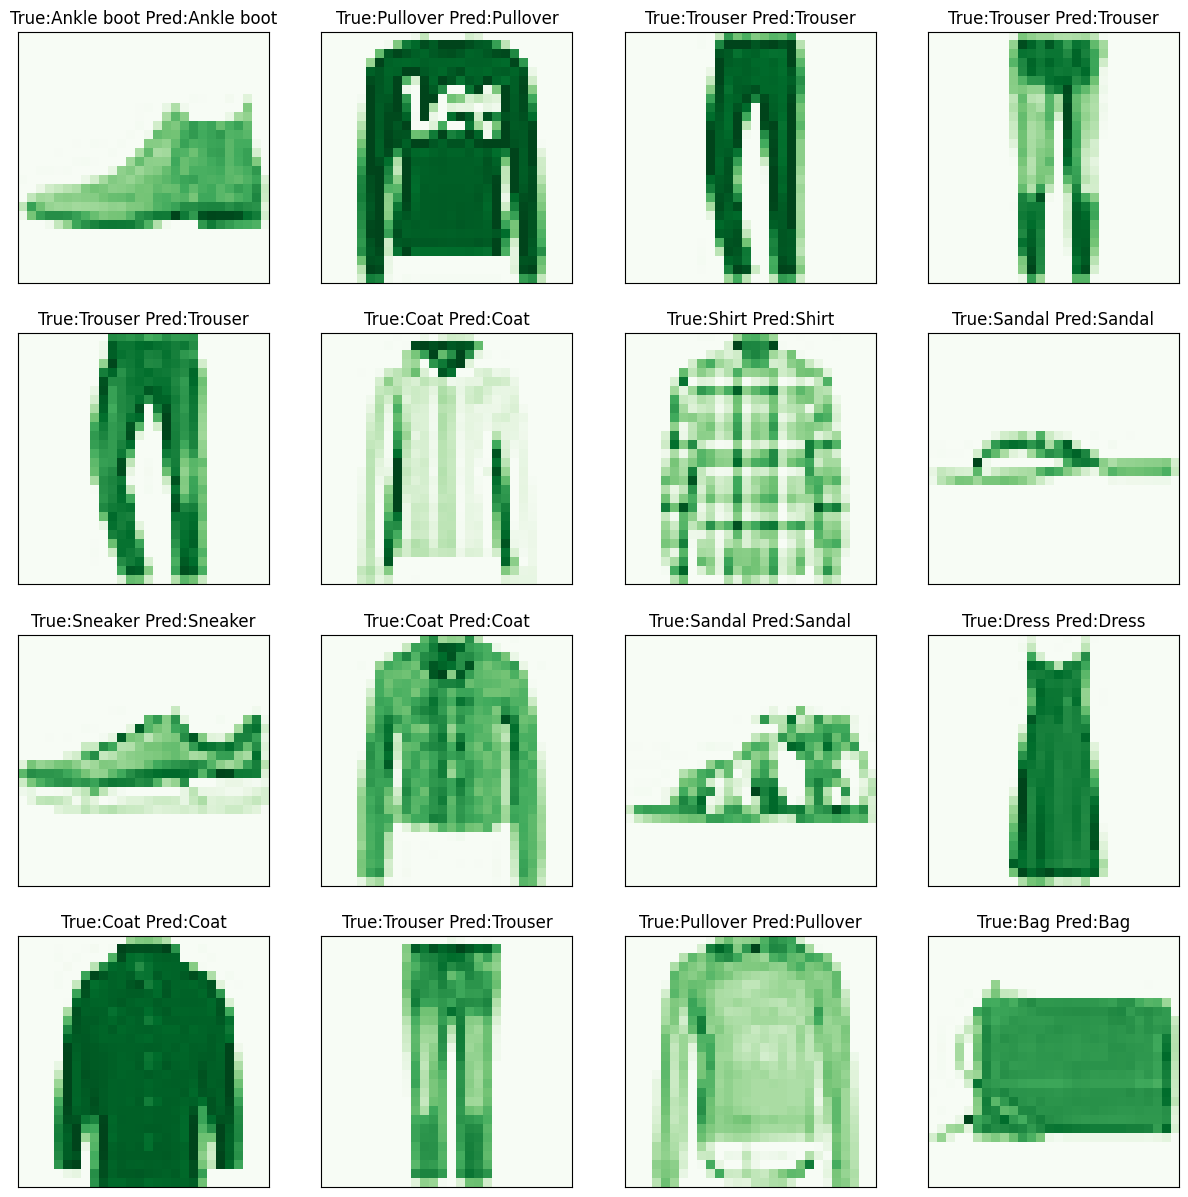

In [51]:
#Plot 16 correctly predicted images and their labels
plt.figure(figsize=(15,15))
for i,ind in enumerate(correct[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[ind].reshape(IMG_ROWS,IMG_COLS),cmap='Greens')
  label_index=train_labels[ind]
  plt.title('True:{} Pred:{}'.format(labels[test_labels[ind]],labels[predicted_classes[ind]]))
plt.show()

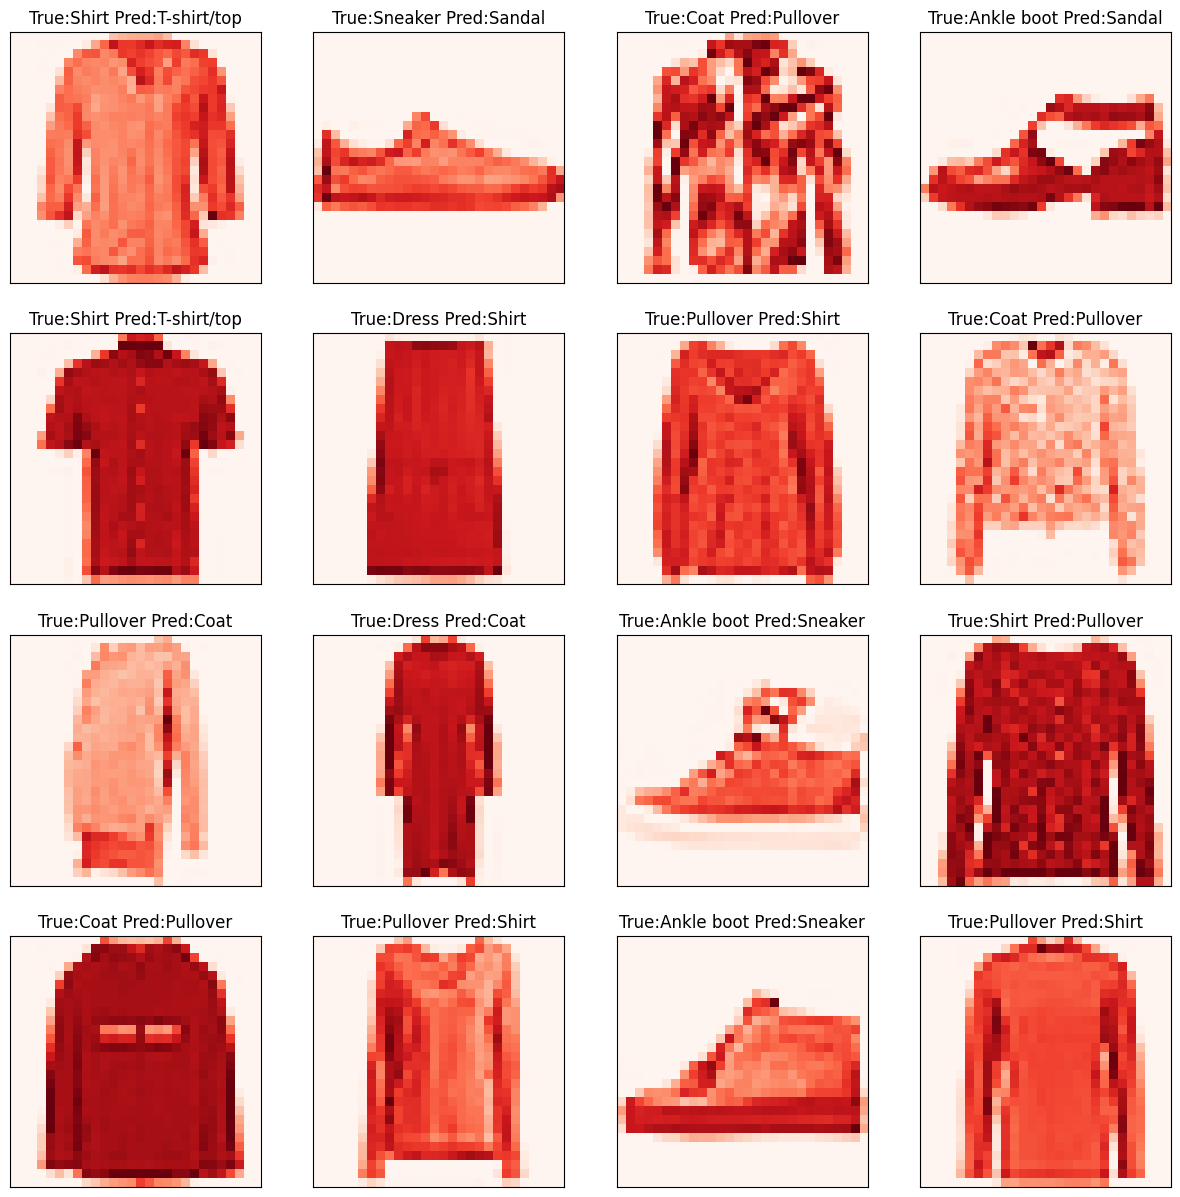

In [52]:
#Plot 16 incorrectly predicted images and their labels
plt.figure(figsize=(15,15))
for i,ind in enumerate(incorrect[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[ind].reshape(IMG_ROWS,IMG_COLS),cmap='Reds')
  label_index=train_labels[ind]
  plt.title('True:{} Pred:{}'.format(labels[test_labels[ind]],labels[predicted_classes[ind]]))
plt.show()

**Create a CNN with Conv2D and MaxPooling2D**

In [53]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [54]:
INPUT_SHAPE=(IMG_ROWS,IMG_COLS,1)

In [55]:
#Load the Fashion MNIST dataset
fashion_data=tf.keras.datasets.fashion_mnist

#Split between 60,000 train samples and 10,000 tesst samples
(train_images,train_labels),(test_images,test_labels)=fashion_data.load_data()

#Reshape
train_images=train_images.reshape(60000,IMG_ROWS,IMG_COLS,1)
test_images=test_images.reshape(10000,IMG_ROWS,IMG_COLS,1)

train_images,test_images=train_images/255.0, test_images/255.0

In [56]:
#Define the architecture of our CNN
class cnn_fmnist:
  @staticmethod
  def build(input_shape,num_classes):
    model=Sequential([
        #CONV => RELU => POOL
        Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [63]:
#One-hot encoding
train_labels=tf.keras.utils.to_categorical(train_labels,NUM_CLASSES)
test_labels=tf.keras.utils.to_categorical(test_labels,NUM_CLASSES)

In [64]:
#Compile the model using Adam optimizer
model=cnn_fmnist.build(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,803,274 (6.88 MB)

 Trainable params: 1,803,274 (6.88 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
#Training Parameters
BATCH_SIZE=128
EPOCHS=50
VALIDATION_SPLIT=0.2

In [67]:
history=model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT,verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9202 - val_loss: 0.6974
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9122 - val_loss: 0.6821
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9964 - loss: 0.0104 - val_accuracy: 0.9183 - val_loss: 0.7948
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9974 - loss: 0.0090 - val_accuracy: 0.9173 - val_loss: 0.7598
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9969 - loss: 0.0109 - val_accuracy: 0.9177 - val_loss: 0.7096
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9967 - loss: 0.0115 - val_accuracy: 0.9220 - val_loss: 0.7450
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9982 - loss: 0.0056 - val_accuracy: 0.9207 - val_loss: 0.8140
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9981 - loss: 0.0066 - val_accuracy: 0.

In [68]:
#Evaluating the model
score=model.evaluate(test_images,test_labels)
print('Test score:',score[0])
print('Test accuracy:',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9120 - loss: 0.8948
Test score: 0.8908217549324036
Test accuracy: 0.9150999784469604


Text(0.5, 1.0, 'Train - Accuracy')

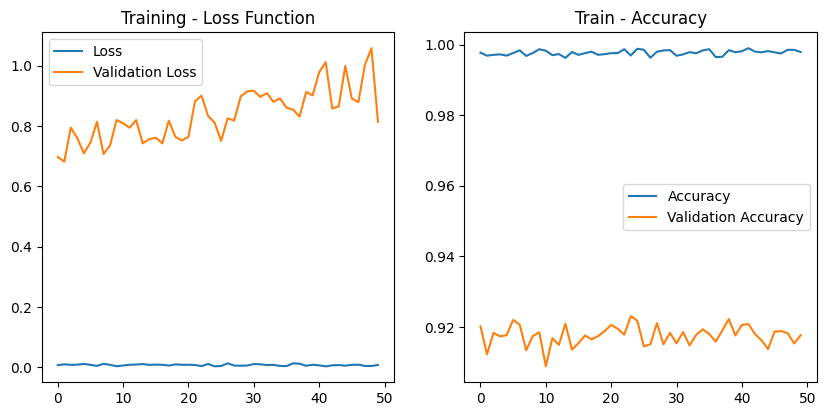

In [69]:
#Plot the loss and accuracy functions for the training and validation sets
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

**Reducing Overfitting with BatchNormalization,Dropout and L2 Regularization**

In [80]:
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [71]:
#Network Parameters
NUM_CLASSES=10
#Reshape 28x28 pixel images to a "flatten" array of 784 pixels
RESHAPED=784

#Input image dimensions
ING_ROWS,IMG_COLS=28,28
INPUT_SHAPE=(IMG_ROWS,IMG_COLS,1)

In [72]:
#Load the Fashion MNIST dataset
fashion_data=tf.keras.datasets.fashion_mnist

#Split between 60,000 train samples and 10,000 tesst samples
(train_images,train_labels),(test_images,test_labels)=fashion_data.load_data()

#Reshape
train_images=train_images.reshape(60000,IMG_ROWS,IMG_COLS,1)
test_images=test_images.reshape(10000,IMG_ROWS,IMG_COLS,1)

train_images,test_images=train_images/255.0, test_images/255.0

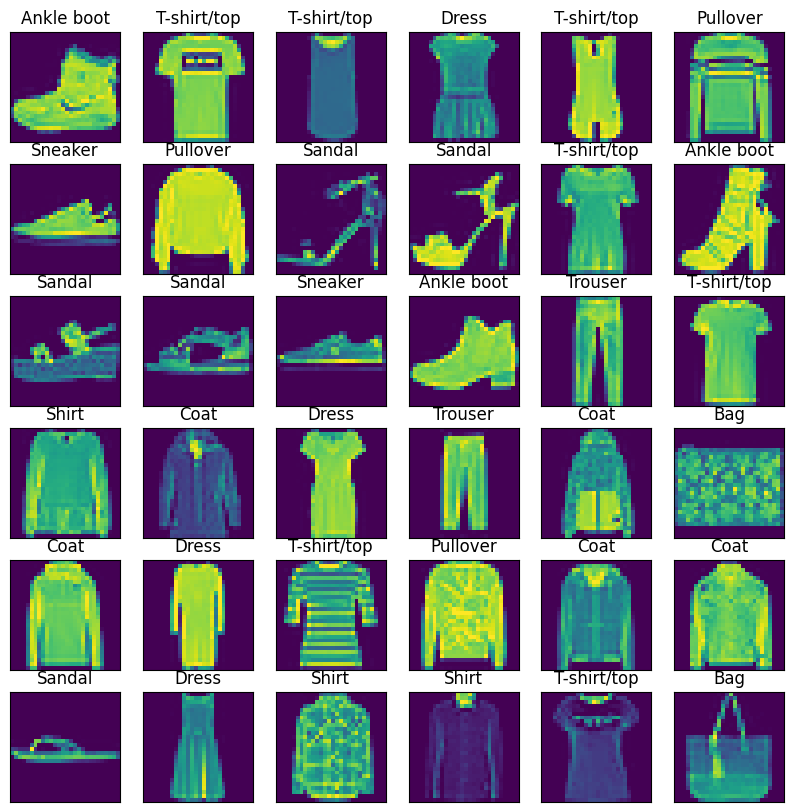

In [73]:
#Visualization
labels={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape(IMG_ROWS,IMG_COLS))
  label_index=train_labels[i]
  plt.title(labels[label_index])
plt.show()

In [74]:
#One-hot encoding
train_labels=tf.keras.utils.to_categorical(train_labels,NUM_CLASSES)
test_labels=tf.keras.utils.to_categorical(test_labels,NUM_CLASSES)

In [78]:
#Define the architecture of our CNN including dropout layers and l2 regularization
class cnn_fmnist:
  @staticmethod
  def build(input_shape,num_classes, use_l2_reg=False,l2_loss_lambda=0.00025):
    l2=regularizers.l2(l2_loss_lambda) if use_l2_reg else None
    if l2 is not None: print('Using L2 regularization %.6f' % l2_loss_lambda)

    model=Sequential([
        #CONV => RELU => POOL
        Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2,input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.15),

        Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Flatten(),
        Dropout(0.4),

        Dense(1024, activation='relu',kernel_regularizer=l2),
        Dropout(0.4),

        Dense(512, activation='relu',kernel_regularizer=l2),
        Dropout(0.2),

        Dense(num_classes, activation='softmax')
    ])
    return model

In [81]:
#Compile the model using Adam optimizer
model=cnn_fmnist.build(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES,use_l2_reg=True)
adam=Adam(learning_rate=0.0001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Using L2 regularization 0.000250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [82]:
#Training Parameters
BATCH_SIZE=128
EPOCHS=50
VALIDATION_SPLIT=0.2

In [83]:
history=model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT,verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4492 - loss: 2.3500 - val_accuracy: 0.4094 - val_loss: 2.0993
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7265 - loss: 1.2212 - val_accuracy: 0.8055 - val_loss: 0.9971
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7588 - loss: 1.1196 - val_accuracy: 0.8299 - val_loss: 0.9219
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7872 - loss: 1.0262 - val_accuracy: 0.8437 - val_loss: 0.8749
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8025 - loss: 0.9798 - val_accuracy: 0.8552 - val_loss: 0.8467
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8221 - loss: 0.9293 - val_accuracy: 0.8633 - val_loss: 0.8092
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8300 - loss: 0.8929 - val_accuracy: 0.8668 - val_loss: 0.7835
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.8605 - val_accuracy: 

In [84]:
#Evaluating the model
score=model.evaluate(test_images,test_labels)
print('Test score:',score[0])
print('Test accuracy:',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9269 - loss: 0.3337
Test score: 0.3297806978225708
Test accuracy: 0.926800012588501


Text(0.5, 1.0, 'Train - Accuracy')

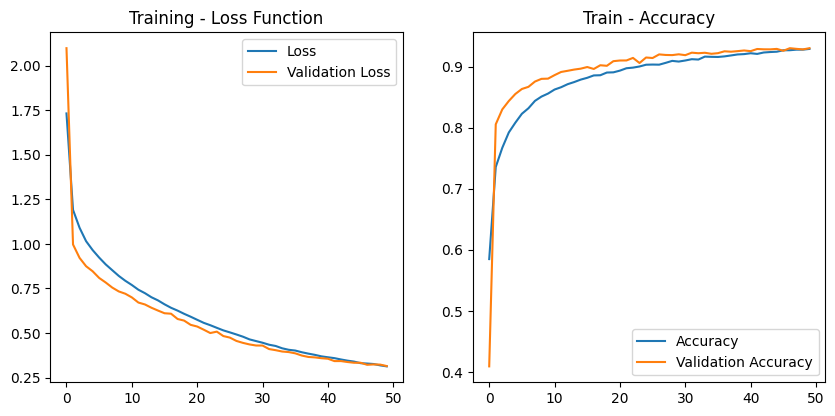

In [85]:
#Plot the loss and accuracy functions for the training and validation sets
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')